# REDES NEURAIS ARTIFICIAIS

[Aula 3 de Deep Learning](http://bit.ly/dn-unb03) da Engenharia de Software da UnB

In [ ]:
# Installing Theano
! pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
! pip install --upgrade tensorflow

# Installing Keras
! pip install --upgrade keras

# Install other packages
! pip install --upgrade pip pandas numpy matplotlib sklearn

# Parte 1 - Preprocessamento dos Dados

### Importar as libs

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importar o dataset

In [44]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
print("X >>\n",X)

X >>
 [[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---
# Parte 2 -Vamos construir uma ANN!

## Importando o Keras


In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Ajustando a ANN ao conjunto de treinamento

In [26]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 1s 806us/step - loss: 0.4893 - accuracy: 0.7956
Epoch 2/100
800/800 [==============================] - 1s 884us/step - loss: 0.4264 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 835us/step - loss: 0.4188 - accuracy: 0.8148
Epoch 4/100
800/800 [==============================] - 1s 831us/step - loss: 0.4128 - accuracy: 0.8319
Epoch 5/100
800/800 [==============================] - 1s 814us/step - loss: 0.4089 - accuracy: 0.8340
Epoch 6/100
800/800 [==============================] - 1s 811us/step - loss: 0.4065 - accuracy: 0.8328
Epoch 7/100
800/800 [==============================] - 1s 861us/step - loss: 0.4039 - accuracy: 0.8346
Epoch 8/100
800/800 [==============================] - 1s 866us/step - loss: 0.4022 - accuracy: 0.8350
Epoch 9/100
800/800 [==============================] - 1s 876us/step - loss: 0.4014 - accuracy: 0.8349
Epoch 10/100
800/800 [==============================] - 1s 930us/step - l

# Parte 3 - Fazendo predições e avaliando o modelo

## Prevendo os resultados com o conjunto de testes

In [10]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Criando uma Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1549   46]
 [ 266  139]]


In [12]:
print((cm[0][0] + cm[1][1])/sum(cm[:][0]+cm[:][1]) * 100, "%")

84.39999999999999 %


---
# Parte 4 - Evaluating, Improving and Tuning the ANN

# Exercício 2

### Aluno: Lucas Maciel
#### Matrícula: 17/0070735

# Alterações
* função de ativação da primeira e segunda camada para Hyperbolic Tangent
* Dropout para reduzir overfitting no conjunto de treinamento
* Batch Size de 20

In [49]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def get_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 11))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    return classifier
my_classifier = get_classifier()
my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
train_history = my_classifier.fit(X_train, y_train, batch_size = 20, epochs = 100, verbose=0)

## Gráfico de Convergência

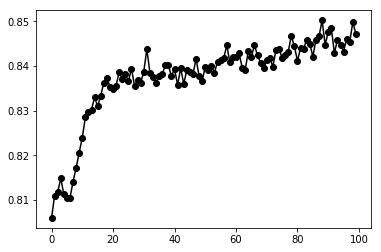

In [52]:
plt.plot(list(train_history.history.values())[1],'k-o')

## Observações
* Nas primeiras 40 Épocas a Rede Neural atingiu a taxa de 84% e se manteve constante

## Predição no Conjunto de Testes

In [53]:
y_pred = my_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

## Taxa de Acerto no conjunto de testes

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("{0}%".format((cm[0][0] + cm[1][1])/sum(cm[:][0]+cm[:][1]) * 100))

86.55000000000001%


# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)